In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [6]:

# load the data
data = pd.read_csv(
    'apartmentComplexData.txt', 
    delimiter=',',
    names=['1', '2', 'complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr', '8', 'medianCompexValue']    
)

In [5]:
# check the data types, in this case everything looks fine no changes need to be made.
data.dtypes

1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [7]:
data.head()

,1,2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,8,medianCompexValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [9]:

# check for missing values
display(data.isna().any())

# drop any missing values
price_data = data.dropna()

# let's check to make sure they've all been removed.
data.isna().any()

1                     False
2                     False
complexAge            False
totalRooms            False
totalBedrooms         False
complexInhabitants    False
apartmentsNr          False
8                     False
medianCompexValue     False
dtype: bool

1                     False
2                     False
complexAge            False
totalRooms            False
totalBedrooms         False
complexInhabitants    False
apartmentsNr          False
8                     False
medianCompexValue     False
dtype: bool

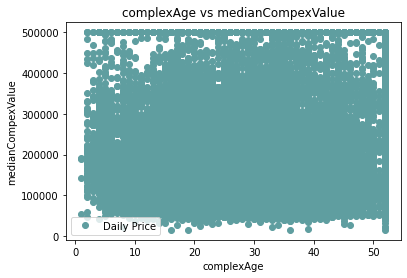

In [10]:
# define the x & y data.
x = data['complexAge']
y = data['medianCompexValue']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'Daily Price')

# make sure it's formatted.
plt.title("complexAge vs medianCompexValue")
plt.xlabel("complexAge")
plt.ylabel("medianCompexValue")
plt.legend()

plt.show()

In [11]:
# let's measure that correlation
data.corr()

,1,2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,8,medianCompexValue
1,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
2,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
complexAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
complexInhabitants,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
apartmentsNr,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
8,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianCompexValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


In [12]:
# let's take a look at a statistical summary.
price_data.describe()

,1,2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,8,medianCompexValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7de3798590>,
      dtype=object)

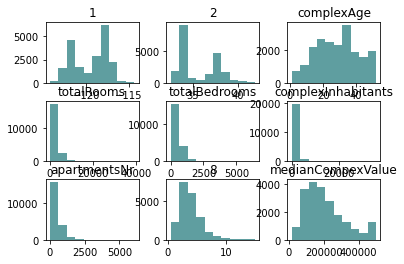

In [13]:
data.hist(grid = False, color = 'cadetblue')

In [ ]:
# define our input variable (X) & output variable.
Y = data.drop('oil_price', axis = 1)
X = data[['oil_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)